In [1]:
!pip install requests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install sentic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentic: filename=sentic-0.0.8-py3-none-any.whl size=52041395 sha256=e120944ca9f0a950a7d44e3468c3e705fcb735c3b84220030518e20264e117c4
  Stored in directory: /root/.cache/pip/wheels/6a/31/be/b16fd01d315bb124036ef7e28d0a3876090cedcfd661926d40
Successfully built sentic


In [5]:
!pip install vader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sonopy: filename=sonopy-0.1.2-py3-none-any.whl size=2878 sha256=3bf7788abd15d75134b1ad3def918dbb8cdc19432712af1c677afbd1f45888d8
  Stored in directory: /root/.cache/pip/wheels/61/ad/07/1ac1172c8a0b8754f595f2f6779bc7dcbe75f1783d5b576b76
Successfully built sonopy


In [6]:
import csv
import requests
from bs4 import BeautifulSoup

In [7]:
# Função para extrair as avaliações do filme
def get_reviews(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = soup.find_all('div', {'class': 'lister-item-content'})
    return reviews[:10]

In [8]:
# URL dos filmes
urls = {
    'Homem de Ferro': 'https://www.imdb.com/title/tt0371746/reviews',
    'Pantera Negra': 'https://www.imdb.com/title/tt9114286/reviews?ref_=tt_urv',
    'Toy Story': 'https://www.imdb.com/title/tt0114709/reviews'
}

In [9]:
# Extrair as avaliações para cada filme
reviews = []
for title, url in urls.items():
    for review in get_reviews(url):
        text = review.find('div', {'class': 'text'}).get_text().strip()
        rating = review.find('span', {'class': 'rating-other-user-rating'})
        if rating is not None:
            rating = rating.find('span').get_text()
        else:
            rating = ''
        reviews.append([title, rating, text])

In [10]:
# Escrever as avaliações em um arquivo CSV
with open('Reviews.csv', 'w', encoding='utf-8', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Rating', 'Review'])
    writer.writerows(reviews)

In [11]:
for title, url in urls.items():
    for review in get_reviews(url):
        text = review.find('div', {'class': 'text'}).get_text().strip()
        rating = review.find('span', {'class': 'rating-other-user-rating'})
        if rating is not None:
            rating = rating.find('span').get_text()
        else:
            rating = ''
        print(f"Title: {title}\nRating: {rating}\nReview: {text}\n")
        reviews.append([title, rating, text])


Title: Homem de Ferro
Rating: 9
Review: When it comes to ranking the Marvel superhero(live action) films, Iron Man is for me up there with the better ones. It looks fabulous, the whole film is very slickly made with top-notch special effects(which look like time and effort was really put into it), awesome-looking futuristic gadgets and Iron Man's suit will be a guaranteed delight to anybody who is familiar or loves anything to do with the superhero. There is a pulsating soundtrack that adds much to the tension of the first half of the story and the enormously fun action sequences, which are exciting and tense with expertly choreography. The script crackles with smart humour that doesn't go overload, all of which is laugh-out-loud funny, yet the hostage plotting that takes up the first part of the film is intelligently written and somehow avoids being over-serious or over-familiar. The story has enough to allow you to emotionally connect with Iron Man(who I've always considered one of M

In [12]:
!pip install senticnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 MB 3.5 MB/s eta 0:00:00


In [13]:
!ppi isntall vaderSentiment

/bin/bash: ppi: command not found


In [16]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 6.9 MB/s eta 0:00:00


In [56]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sentic import SenticPhrase
from textblob import TextBlob

# Função para analisar sentimentos com VADER
def analyserText(text):
    analyser = SentimentIntensityAnalyzer()
    score = analyser.polarity_scores(text)
    compound_score = score["compound"]
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Função para analisar sentimentos com Sentic
def analyserSentic(text):
    sp = SenticPhrase(text)
    score = sp.get_polarity(text)
    if score >= 0.85:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Função para analisar sentimentos com TextBlob
def analyserTextBlob(text):
    tb = TextBlob(text)
    polarity = tb.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Ler o arquivo CSV
df = pd.read_csv('Reviews.csv')

# Adicionar colunas com os resultados de cada modelo de análise de sentimentos
df["Vader"] = df["Review"].apply(analyserText)
df["Sentic"] = df["Review"].apply(analyserSentic)
df["TextBlob"] = df["Review"].apply(analyserTextBlob)

# Exibir as 5 primeiras linhas do dataframe
print(df.head())



            Title  Rating                                             Review  \
0  Homem de Ferro     9.0  When it comes to ranking the Marvel superhero(...   
1  Homem de Ferro     8.0  In my attempt to rewatch all the MCU-movies ch...   
2  Homem de Ferro     8.0  MCU 2021 MarathonMCU #1:Iron Man was my favori...   
3  Homem de Ferro     8.0  Tony Stark (Robert Downey Jr.) is a hard playi...   
4  Homem de Ferro     9.0  With a B-list superhero, a risky lead actor, a...   

      Vader   Sentic  TextBlob  
0  positive  neutral  positive  
1  positive  neutral  positive  
2  positive  neutral  positive  
3  positive  neutral  positive  
4  positive  neutral  positive  


In [57]:
grouped_reviews = reviews.groupby('Title')
avg_sentiments = grouped_reviews.mean()

most_positive_movie = avg_sentiments['Vader'].idxmax()
num_positive_reviews = avg_sentiments.loc[most_positive_movie, 'Vader']

print("O filme com o maior número de comentários positivos é:", most_positive_movie)
print("Número de comentários positivos:", num_positive_reviews)


O filme com o maior número de comentários positivos é: Toy Story
Número de comentários positivos: 0.97241


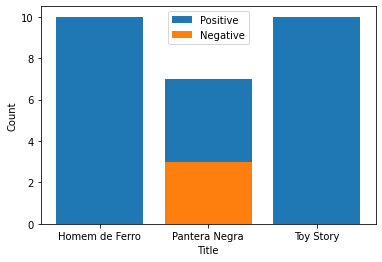

In [60]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Importar os dados
df = pd.read_csv("Reviews.csv")

# Definir a função para analisar o sentimento usando Vader
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    compound_score = scores["compound"]
    
    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"
    
# Calcular o sentimento para cada review
df["Vader"] = df["Review"].apply(get_vader_sentiment)

# Criar um novo DataFrame com as colunas "Title" e "Vader"
df2 = df[["Title", "Vader"]]

# Filtrar apenas as linhas com avaliações positivas ou negativas
df2 = df2[(df2["Vader"] == "positive") | (df2["Vader"] == "negative")]

# Agrupar as avaliações por título e contar o número de avaliações positivas e negativas para cada filme
df3 = df2.groupby(["Title", "Vader"]).size().reset_index(name="Count")

# Criar um gráfico de barras com o número de avaliações positivas e negativas para cada filme
fig, ax = plt.subplots()
ax.bar(df3[df3["Vader"]=="positive"]["Title"], df3[df3["Vader"]=="positive"]["Count"], label="Positive")
ax.bar(df3[df3["Vader"]=="negative"]["Title"], df3[df3["Vader"]=="negative"]["Count"], label="Negative")

# Configurar o gráfico
ax.set_xlabel("Title")
ax.set_ylabel("Count")
ax.legend()

# Mostrar o gráfico
plt.show()


In [61]:
# 2. A. Resposta: Homem de Ferro e Toy Sotry contém a mesma quantidade de comentários positivos.
# 2. B. Resposta: Sim, pode haver diferença na classificação dos comentários entre as abordagens de análise de sentimento.
#Isso ocorre porque cada abordagem utiliza diferentes técnicas e algoritmos para determinar o sentimento de um texto.
#Por exemplo, o VADER usa regras aceitas em léxicos, o TextBlob usa análise de polaridade baseada em padrões e o SenticNet usa uma abordagem baseada em ontologia. Além disso, cada abordagem pode ter restrições em relação à linguagem, contexto e cultura, o que pode afetar a precisão da análise de sentimento. Portanto, é importante escolher a abordagem mais adequada para uma tarefa específica em questão e ter em mente que diferentes abordagens podem produzir resultados diferentes na classificação dos comentários.
